In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#a function to load data
def load_data(file):
    #read data
    df = pd.read_csv(file, index_col=0)
    #reverse the sign of each log fold change to make comparisons read infected vs uninfected (origionally they read uninfected vs infected)
    df["logFC"] = df["logFC"] * -1
    #add column for significantly up or down
    df["regulation"] = df["FDR"]
    #if FDR is less than cutoff and logFC is greater than 0, regulation = up
    df.loc[(df['FDR'] < 0.05) & (df['logFC'] > 0), 'regulation'] = 'up'
    #if FDR is less than cutoff and logFC is less than 0, regulation = down
    df.loc[(df['FDR'] < 0.05) & (df['logFC'] < 0), 'regulation'] = 'down'
    #if FDR is greater than cutoff, regulation = NA
    df.loc[df['FDR'] > 0.05, 'regulation'] = 'NA'
    
    return df
    

#### Load data

In [6]:
#third instar
third_instar_cur = load_data('data/edgeR/infected_vs_uninfected_by_plant/third_instar_inf_vs_uninf_curassavica')
third_instar_inc = load_data('data/edgeR/infected_vs_uninfected_by_plant/third_instar_inf_vs_uninf_incarnata')

#fifth instar
fifth_instar_cur = load_data('data/edgeR/infected_vs_uninfected_by_plant/fifth_instar_inf_vs_uninf_curassavica')
fifth_instar_inc = load_data('data/edgeR/infected_vs_uninfected_by_plant/fifth_instar_inf_vs_uninf_incarnata')

#early pupa
early_pupa_cur = load_data('data/edgeR/infected_vs_uninfected_by_plant/early_pupa_inf_vs_uninf_curassavica')
early_pupa_inc = load_data('data/edgeR/infected_vs_uninfected_by_plant/early_pupa_inf_vs_uninf_incarnata')

#late pupa
late_pupa_cur = load_data('data/edgeR/infected_vs_uninfected_by_plant/late_pupa_inf_vs_uninf_curassavica')
late_pupa_inc = load_data('data/edgeR/infected_vs_uninfected_by_plant/late_pupa_inf_vs_uninf_incarnata')

#adult
adult_cur = load_data('data/edgeR/infected_vs_uninfected_by_plant/adult_inf_vs_uninf_curassavica')
adult_inc = load_data('data/edgeR/infected_vs_uninfected_by_plant/adult_inf_vs_uninf_incarnata')


#### Make Volcano Plots

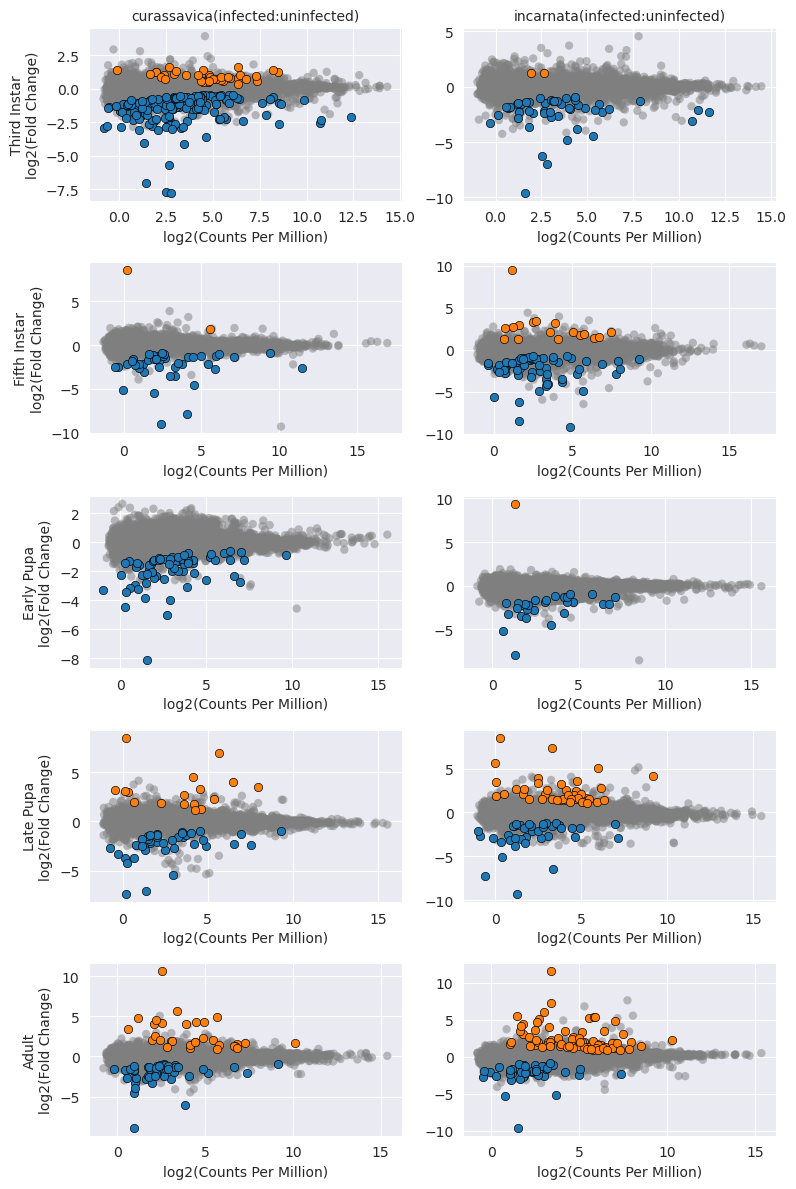

In [8]:
sns.set_style('darkgrid')
sns.set_palette("tab10")

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]] = plt.subplots(5, 2, figsize=(8, 12))

#third instar plots
#curassavica
#plot non-regulated
sns.scatterplot(data=third_instar_cur.loc[third_instar_cur["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax1, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=third_instar_cur.loc[third_instar_cur["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax1, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=third_instar_cur.loc[third_instar_cur["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax1, edgecolor = 'black', color = "tab:blue")

ax1.set_title("curassavica(infected:uninfected)", size=10)
ax1.set_ylabel('Third Instar\nlog2(Fold Change)')
ax1.set_xlabel("log2(Counts Per Million)")

#incarnata
#plot non-regulated
sns.scatterplot(data=third_instar_inc.loc[third_instar_inc["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax2, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=third_instar_inc.loc[third_instar_inc["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax2, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=third_instar_inc.loc[third_instar_inc["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax2, edgecolor = 'black', color = "tab:blue")

ax2.set_title("incarnata(infected:uninfected)", size=10)
ax2.set_xlabel("log2(Counts Per Million)")
ax2.set_ylabel("")


#fifth instar plots
#curassavica
#plot non-regulated
sns.scatterplot(data=fifth_instar_cur.loc[fifth_instar_cur["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax3, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=fifth_instar_cur.loc[fifth_instar_cur["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax3, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=fifth_instar_cur.loc[fifth_instar_cur["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax3, edgecolor = 'black', color = "tab:blue")

ax3.set_ylabel("Fifth Instar\nlog2(Fold Change)")
ax3.set_xlabel("log2(Counts Per Million)")

#incarnata
#plot non-regulated
sns.scatterplot(data=fifth_instar_inc.loc[fifth_instar_inc["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax4, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=fifth_instar_inc.loc[fifth_instar_inc["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax4, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=fifth_instar_inc.loc[fifth_instar_inc["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax4, edgecolor = 'black', color = "tab:blue")

ax4.set_xlabel("log2(Counts Per Million)")
ax4.set_ylabel("")

#early pupa plots
#curassavica
#plot non-regulated
sns.scatterplot(data=early_pupa_cur.loc[early_pupa_cur["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax5, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=early_pupa_cur.loc[early_pupa_cur["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax5, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=early_pupa_cur.loc[early_pupa_cur["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax5, edgecolor = 'black', color = "tab:blue")

ax5.set_ylabel("Early Pupa\nlog2(Fold Change)")
ax5.set_xlabel("log2(Counts Per Million)")

#incarnata
#plot non-regulated
sns.scatterplot(data=early_pupa_inc.loc[early_pupa_inc["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax6, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=early_pupa_inc.loc[early_pupa_inc["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax6, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=early_pupa_inc.loc[early_pupa_inc["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax6, edgecolor = 'black', color = "tab:blue")

ax6.set_xlabel("log2(Counts Per Million)")
ax6.set_ylabel("")

#late pupa plots
#curassavica
#plot non-regulated
sns.scatterplot(data=late_pupa_cur.loc[late_pupa_cur["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax7, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=late_pupa_cur.loc[late_pupa_cur["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax7, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=late_pupa_cur.loc[late_pupa_cur["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax7, edgecolor = 'black', color = "tab:blue")

ax7.set_ylabel("Late Pupa\nlog2(Fold Change)")
ax7.set_xlabel("log2(Counts Per Million)")

#incarnata
#plot non-regulated
sns.scatterplot(data=late_pupa_inc.loc[late_pupa_inc["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax8, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=late_pupa_inc.loc[late_pupa_inc["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax8, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=late_pupa_inc.loc[late_pupa_inc["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax8, edgecolor = 'black', color = "tab:blue")

ax8.set_xlabel("log2(Counts Per Million)")
ax8.set_ylabel("")


#adult plots
#curassavica
#plot non-regulated
sns.scatterplot(data=adult_cur.loc[adult_cur["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax9, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=adult_cur.loc[adult_cur["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax9, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=adult_cur.loc[adult_cur["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax9, edgecolor = 'black', color = "tab:blue")

ax9.set_ylabel("Adult\nlog2(Fold Change)")
ax9.set_xlabel("log2(Counts Per Million)")

#incarnata
#plot non-regulated
sns.scatterplot(data=adult_inc.loc[adult_inc["regulation"] == "NA"], 
                x="logCPM", y="logFC", ax=ax10, edgecolor = 'none', color = "tab:gray", alpha=0.5)
#plot up regulated
sns.scatterplot(data=adult_inc.loc[adult_inc["regulation"] == "up"], 
                x="logCPM", y="logFC", ax=ax10, edgecolor = 'black', color = "tab:orange")
#plot down regulated
sns.scatterplot(data=adult_inc.loc[adult_inc["regulation"] == "down"], 
                x="logCPM", y="logFC", ax=ax10, edgecolor = 'black', color = "tab:blue")

ax10.set_xlabel("log2(Counts Per Million)")
ax10.set_ylabel("")


plt.tight_layout()





#### Number of DEGs plots

In [9]:
#get DGE counts
third_instar_cur_dge_count = len(third_instar_cur.loc[(third_instar_cur["regulation"] == "up") | (third_instar_cur["regulation"] == "down")].index)
third_instar_inc_dge_count = len(third_instar_inc.loc[(third_instar_inc["regulation"] == "up") | (third_instar_inc["regulation"] == "down")].index)

fifth_instar_cur_dge_count = len(fifth_instar_cur.loc[(fifth_instar_cur["regulation"] == "up") | (fifth_instar_cur["regulation"] == "down")].index)
fifth_instar_inc_dge_count = len(fifth_instar_inc.loc[(fifth_instar_inc["regulation"] == "up") | (fifth_instar_inc["regulation"] == "down")].index)

early_pupa_cur_dge_count = len(early_pupa_cur.loc[(early_pupa_cur["regulation"] == "up") | (early_pupa_cur["regulation"] == "down")].index)
early_pupa_inc_dge_count = len(early_pupa_inc.loc[(early_pupa_inc["regulation"] == "up") | (early_pupa_inc["regulation"] == "down")].index)

late_pupa_cur_dge_count = len(late_pupa_cur.loc[(late_pupa_cur["regulation"] == "up") | (late_pupa_cur["regulation"] == "down")].index)
late_pupa_inc_dge_count = len(late_pupa_inc.loc[(late_pupa_inc["regulation"] == "up") | (late_pupa_inc["regulation"] == "down")].index)

adult_cur_dge_count = len(adult_cur.loc[(adult_cur["regulation"] == "up") | (adult_cur["regulation"] == "down")].index)
adult_inc_dge_count = len(adult_inc.loc[(adult_inc["regulation"] == "up") | (adult_inc["regulation"] == "down")].index)

#assemble dictionary
dge_counts = {'developmental-stage' : ['third-instar', 'third-instar', 'fifth-instar', 'fifth-instar', 'early-pupa', 'early-pupa', 'late-pupa', 'late-pupa', 'adult', 'adult'],
             'plant' : ['curassavica', 'incarnata', 'curassavica', 'incarnata', 'curassavica', 'incarnata', 'curassavica', 'incarnata','curassavica', 'incarnata'],
             'inf_v_uninf_dge_count' : [third_instar_cur_dge_count, third_instar_inc_dge_count, fifth_instar_cur_dge_count, fifth_instar_inc_dge_count, early_pupa_cur_dge_count, early_pupa_inc_dge_count, late_pupa_cur_dge_count, late_pupa_inc_dge_count, adult_cur_dge_count, adult_inc_dge_count]}

dge_counts = pd.DataFrame(dge_counts)

Text(0, 0.5, 'n diff. exp. genes (infected:uninfected)')

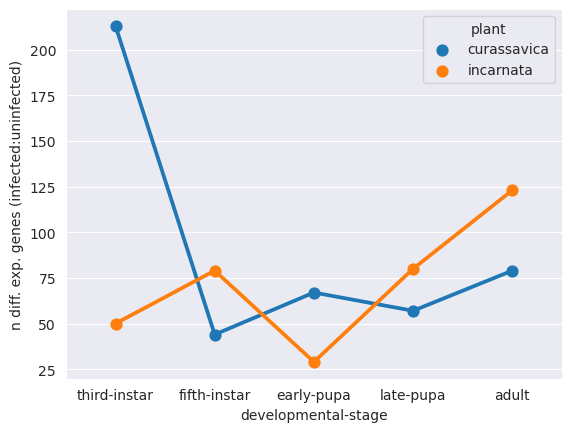

In [10]:
#plot comparisons
sns.set_style('darkgrid')
sns.set_palette("tab10")

ax = sns.pointplot(data=dge_counts, x="developmental-stage", y="inf_v_uninf_dge_count", hue="plant")
ax.set_ylabel("n diff. exp. genes (infected:uninfected)")